In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import concatenate_videoclips, VideoFileClip
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip
from google.colab import files

/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """
/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: DeprecationWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
  from scipy.ndimage.filters import sobel

  if event.key is 'enter':

  from pkg_resources import resource_stream, resource_exists

Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)

Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)

Implementing implicit namespace packages (as specified in 

# Environment setup and discretization function

In [2]:
env = gym.make('CartPole-v1')

def discretize_state(state, bins):
    state_bins = [
        np.linspace(-4.8, 4.8, bins),  # cart position
        np.linspace(-4, 4, bins),     # cart velocity
        np.linspace(-0.418, 0.418, bins), # pole angle
        np.linspace(-4, 4, bins)      # pole angular velocity
    ]
    return tuple(np.digitize(state[i], state_bins[i]) for i in range(len(state)))


  deprecation(

  deprecation(



# Hyperparameters and initialization of the Q-table

In [5]:
bins = 20
alpha = 0.05
gamma = 0.995
epsilon = 1.0
epsilon_decay = 0.999
min_epsilon = 0.01
episodes = 20000
interval = 500
video_interval = 10000

num_states = (bins,) * 4
num_actions = env.action_space.n
Q = np.zeros(num_states + (num_actions,))

rewards_per_episode = []
average_rewards = []
intervals = []
video_files = []


# SARSA algorithm implementation

In [6]:
for episode in range(episodes):
    state = discretize_state(env.reset(), bins)
    done = False
    total_reward = 0

    # Choose the initial action using epsilon-greedy
    if np.random.random() < epsilon:
        action = env.action_space.sample()  # exploration
    else:
        action = np.argmax(Q[state])  # exploitation

    while not done:
        next_state_raw, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state_raw, bins)
        total_reward += reward

        # Choose next action using epsilon-greedy
        if np.random.random() < epsilon:
            next_action = env.action_space.sample()  # exploration
        else:
            next_action = np.argmax(Q[next_state])  # exploitation

        # Update Q-table using the SARSA update rule
        Q[state][action] += alpha * (
            reward + gamma * Q[next_state][next_action] - Q[state][action]
        )

        state, action = next_state, next_action

    rewards_per_episode.append(total_reward)

    if (episode + 1) % interval == 0:
        avg_reward = np.mean(rewards_per_episode[-interval:])
        average_rewards.append(avg_reward)
        intervals.append(episode + 1)
        print(f"Episode {episode + 1}, Avg Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

    if (episode + 1) % video_interval == 0:
        frames = []
        eval_state = discretize_state(env.reset(), bins)
        eval_done = False

        # Use the policy (greedy exploitation) during evaluation
        while not eval_done:
            frame = env.render(mode='rgb_array')
            frames.append(frame)

            eval_action = np.argmax(Q[eval_state])
            eval_state_raw, _, eval_done, _ = env.step(eval_action)
            eval_state = discretize_state(eval_state_raw, bins)

        video_filename = f"evaluation_video_{episode + 1}.mp4"
        video_clip = ImageSequenceClip(frames, fps=30)
        video_clip.write_videofile(video_filename, codec="libx264")

        video_files.append(video_filename)

    epsilon = max(min_epsilon, epsilon * epsilon_decay)  # decay epsilon

video_clips = [VideoFileClip(clip) for clip in video_files]
final_video_clip = concatenate_videoclips(video_clips)

final_video_path = "final_video.mp4"
final_video_clip.write_videofile(final_video_path, codec="libx264")

files.download(final_video_path)

Episode 500, Avg Reward: 25.02, Epsilon: 0.607
Episode 1000, Avg Reward: 29.88, Epsilon: 0.368
Episode 1500, Avg Reward: 36.95, Epsilon: 0.223
Episode 2000, Avg Reward: 63.90, Epsilon: 0.135
Episode 2500, Avg Reward: 112.15, Epsilon: 0.082
Episode 3000, Avg Reward: 138.38, Epsilon: 0.050
Episode 3500, Avg Reward: 149.86, Epsilon: 0.030
Episode 4000, Avg Reward: 149.52, Epsilon: 0.018
Episode 4500, Avg Reward: 149.18, Epsilon: 0.011
Episode 5000, Avg Reward: 152.23, Epsilon: 0.010
Episode 5500, Avg Reward: 148.28, Epsilon: 0.010
Episode 6000, Avg Reward: 152.54, Epsilon: 0.010
Episode 6500, Avg Reward: 146.80, Epsilon: 0.010
Episode 7000, Avg Reward: 148.91, Epsilon: 0.010
Episode 7500, Avg Reward: 153.70, Epsilon: 0.010
Episode 8000, Avg Reward: 152.53, Epsilon: 0.010
Episode 8500, Avg Reward: 145.98, Epsilon: 0.010
Episode 9000, Avg Reward: 159.37, Epsilon: 0.010
Episode 9500, Avg Reward: 158.62, Epsilon: 0.010


See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



Episode 10000, Avg Reward: 159.19, Epsilon: 0.010
Moviepy - Building video evaluation_video_10000.mp4.
Moviepy - Writing video evaluation_video_10000.mp4



Moviepy - Done !
Moviepy - video ready evaluation_video_10000.mp4
Episode 10500, Avg Reward: 157.89, Epsilon: 0.010
Episode 11000, Avg Reward: 155.24, Epsilon: 0.010
Episode 11500, Avg Reward: 157.92, Epsilon: 0.010
Episode 12000, Avg Reward: 155.20, Epsilon: 0.010
Episode 12500, Avg Reward: 155.27, Epsilon: 0.010
Episode 13000, Avg Reward: 156.87, Epsilon: 0.010
Episode 13500, Avg Reward: 161.30, Epsilon: 0.010
Episode 14000, Avg Reward: 162.13, Epsilon: 0.010
Episode 14500, Avg Reward: 145.34, Epsilon: 0.010
Episode 15000, Avg Reward: 162.40, Epsilon: 0.010
Episode 15500, Avg Reward: 161.44, Epsilon: 0.010
Episode 16000, Avg Reward: 146.33, Epsilon: 0.010
Episode 16500, Avg Reward: 159.89, Epsilon: 0.010
Episode 17000, Avg Reward: 151.88, Epsilon: 0.010
Episode 17500, Avg Reward: 175.24, Epsilon: 0.010
Episode 18000, Avg Reward: 179.10, Epsilon: 0.010
Episode 18500, Avg Reward: 174.00, Epsilon: 0.010
Episode 19000, Avg Reward: 179.84, Epsilon: 0.010
Episode 19500, Avg Reward: 176.15,

Moviepy - Done !
Moviepy - video ready evaluation_video_20000.mp4
Moviepy - Building video final_video.mp4.
Moviepy - Writing video final_video.mp4



t:  97%|█████████▋| 308/319 [00:02<00:00, 107.05it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file evaluation_video_20000.mp4, 720000 bytes wanted but 0 bytes read,at frame 156/157, at time 5.20/5.20 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready final_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plot average rewards

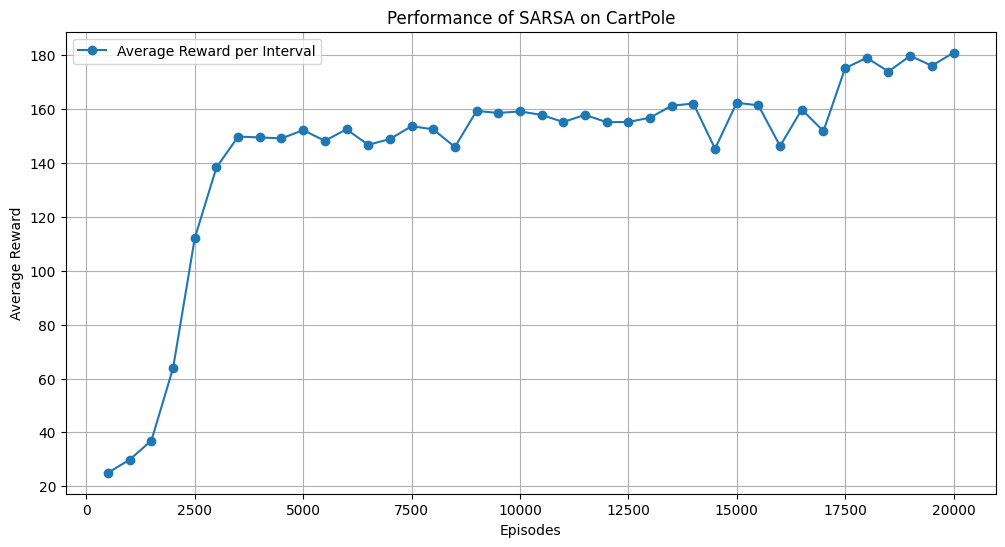

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(intervals, average_rewards, marker='o', label="Average Reward per Interval")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Performance of SARSA on CartPole")
plt.legend()
plt.grid()
plt.show()

# Plot max Q-value over episodes

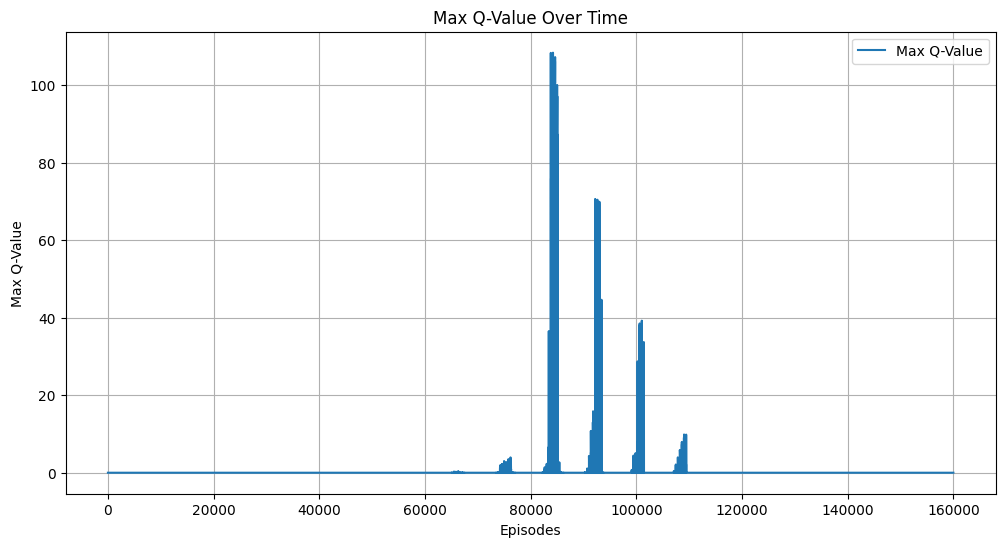

In [8]:
max_q_values = []
for state in np.ndindex(Q.shape[:-1]):
    max_q_values.append(np.max(Q[state]))

plt.figure(figsize=(12, 6))
plt.plot(max_q_values, label="Max Q-Value")
plt.xlabel("Episodes")
plt.ylabel("Max Q-Value")
plt.title("Max Q-Value Over Time")
plt.legend()
plt.grid()
plt.show()

# Fine tuning hyperparameters to improve results

In [10]:
bins = 20
alpha = 0.1
gamma = 0.95
epsilon = 0.2
#epsilon_decay = 0.999
#min_epsilon = 0.01
episodes = 20000
interval = 500
video_interval = 10000

num_states = (bins,) * 4
num_actions = env.action_space.n
Q = np.zeros(num_states + (num_actions,))

rewards_per_episode = []
average_rewards = []
intervals = []
video_files = []

for episode in range(episodes):
    state = discretize_state(env.reset(), bins)
    done = False
    total_reward = 0

    # Choose the initial action using epsilon-greedy
    if np.random.random() < epsilon:
        action = env.action_space.sample()  # exploration
    else:
        action = np.argmax(Q[state])  # exploitation

    while not done:
        next_state_raw, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state_raw, bins)
        total_reward += reward

        # Choose next action using epsilon-greedy
        if np.random.random() < epsilon:
            next_action = env.action_space.sample()  # exploration
        else:
            next_action = np.argmax(Q[next_state])  # exploitation

        # Update Q-table using the SARSA update rule
        Q[state][action] += alpha * (
            reward + gamma * Q[next_state][next_action] - Q[state][action]
        )

        state, action = next_state, next_action

    rewards_per_episode.append(total_reward)

    if (episode + 1) % interval == 0:
        avg_reward = np.mean(rewards_per_episode[-interval:])
        average_rewards.append(avg_reward)
        intervals.append(episode + 1)
        print(f"Episode {episode + 1}, Avg Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

    if (episode + 1) % video_interval == 0:
        frames = []
        eval_state = discretize_state(env.reset(), bins)
        eval_done = False

        # Use the policy (greedy exploitation) during evaluation
        while not eval_done:
            frame = env.render(mode='rgb_array')
            frames.append(frame)

            eval_action = np.argmax(Q[eval_state])
            eval_state_raw, _, eval_done, _ = env.step(eval_action)
            eval_state = discretize_state(eval_state_raw, bins)

        video_filename = f"evaluation_video_{episode + 1}.mp4"
        video_clip = ImageSequenceClip(frames, fps=30)
        video_clip.write_videofile(video_filename, codec="libx264")

        video_files.append(video_filename)

    # Remove epsilon decay to allow SARSA to explore more
    #epsilon = max(min_epsilon, epsilon * epsilon_decay)

video_clips = [VideoFileClip(clip) for clip in video_files]
final_video_clip = concatenate_videoclips(video_clips)

final_video_path = "final_video.mp4"
final_video_clip.write_videofile(final_video_path, codec="libx264")

files.download(final_video_path)

Episode 500, Avg Reward: 12.06, Epsilon: 0.200
Episode 1000, Avg Reward: 21.31, Epsilon: 0.200
Episode 1500, Avg Reward: 46.96, Epsilon: 0.200
Episode 2000, Avg Reward: 99.58, Epsilon: 0.200
Episode 2500, Avg Reward: 110.21, Epsilon: 0.200
Episode 3000, Avg Reward: 110.13, Epsilon: 0.200
Episode 3500, Avg Reward: 118.64, Epsilon: 0.200
Episode 4000, Avg Reward: 124.71, Epsilon: 0.200
Episode 4500, Avg Reward: 130.02, Epsilon: 0.200
Episode 5000, Avg Reward: 131.02, Epsilon: 0.200
Episode 5500, Avg Reward: 138.97, Epsilon: 0.200
Episode 6000, Avg Reward: 150.05, Epsilon: 0.200
Episode 6500, Avg Reward: 144.59, Epsilon: 0.200
Episode 7000, Avg Reward: 143.84, Epsilon: 0.200
Episode 7500, Avg Reward: 152.06, Epsilon: 0.200
Episode 8000, Avg Reward: 153.02, Epsilon: 0.200
Episode 8500, Avg Reward: 163.50, Epsilon: 0.200
Episode 9000, Avg Reward: 164.32, Epsilon: 0.200
Episode 9500, Avg Reward: 168.11, Epsilon: 0.200
Episode 10000, Avg Reward: 168.44, Epsilon: 0.200
Moviepy - Building video

Moviepy - Done !
Moviepy - video ready evaluation_video_10000.mp4
Episode 10500, Avg Reward: 169.93, Epsilon: 0.200
Episode 11000, Avg Reward: 168.46, Epsilon: 0.200
Episode 11500, Avg Reward: 166.32, Epsilon: 0.200
Episode 12000, Avg Reward: 172.30, Epsilon: 0.200
Episode 12500, Avg Reward: 171.11, Epsilon: 0.200
Episode 13000, Avg Reward: 173.36, Epsilon: 0.200
Episode 13500, Avg Reward: 176.66, Epsilon: 0.200
Episode 14000, Avg Reward: 177.34, Epsilon: 0.200
Episode 14500, Avg Reward: 167.97, Epsilon: 0.200
Episode 15000, Avg Reward: 181.60, Epsilon: 0.200
Episode 15500, Avg Reward: 179.13, Epsilon: 0.200
Episode 16000, Avg Reward: 183.15, Epsilon: 0.200
Episode 16500, Avg Reward: 181.64, Epsilon: 0.200
Episode 17000, Avg Reward: 187.82, Epsilon: 0.200
Episode 17500, Avg Reward: 182.37, Epsilon: 0.200
Episode 18000, Avg Reward: 183.85, Epsilon: 0.200
Episode 18500, Avg Reward: 190.21, Epsilon: 0.200
Episode 19000, Avg Reward: 184.54, Epsilon: 0.200
Episode 19500, Avg Reward: 179.57,

Moviepy - Done !
Moviepy - video ready evaluation_video_20000.mp4
Moviepy - Building video final_video.mp4.
Moviepy - Writing video final_video.mp4



Moviepy - Done !
Moviepy - video ready final_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

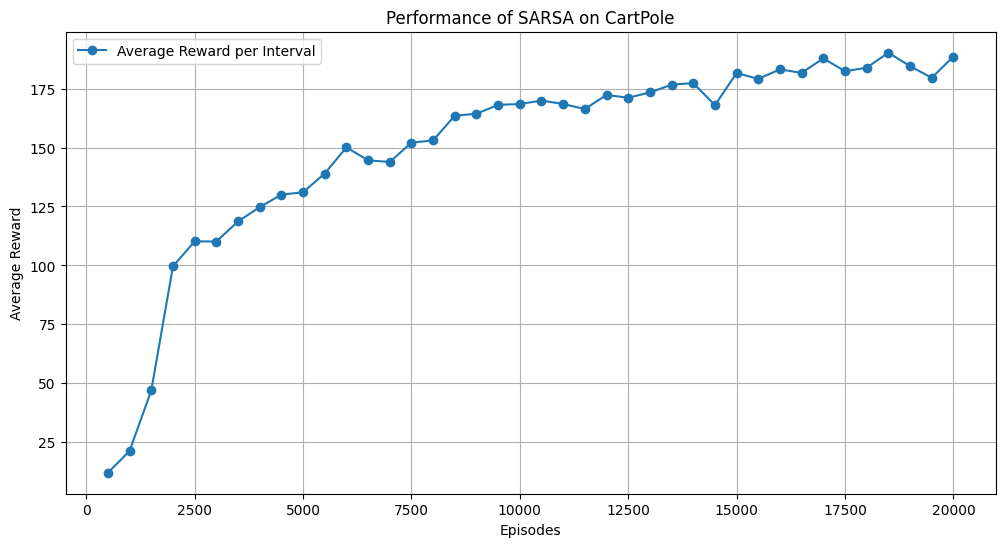

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(intervals, average_rewards, marker='o', label="Average Reward per Interval")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Performance of SARSA on CartPole")
plt.legend()
plt.grid()
plt.show()

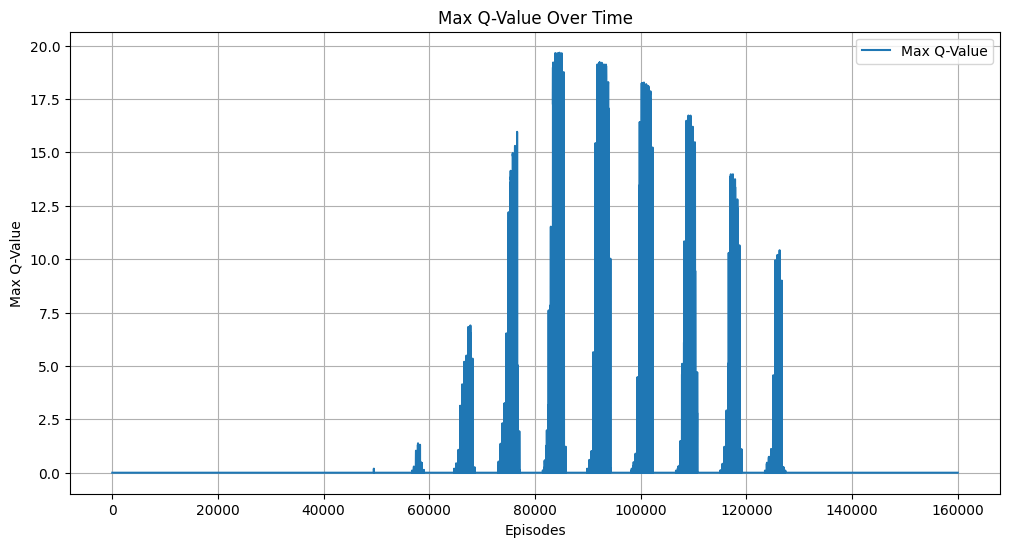

In [12]:
max_q_values = []
for state in np.ndindex(Q.shape[:-1]):
    max_q_values.append(np.max(Q[state]))

plt.figure(figsize=(12, 6))
plt.plot(max_q_values, label="Max Q-Value")
plt.xlabel("Episodes")
plt.ylabel("Max Q-Value")
plt.title("Max Q-Value Over Time")
plt.legend()
plt.grid()
plt.show()